# 轨迹要素整合处理

## 数据加权

### 读取数据

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import math
from shapely import Point
import cartopy.crs as ccrs
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

### 计算模块

In [2]:
# 熵权计算
def D(df_seg):
    df_seg = (df_seg-df_seg.min())/(df_seg.max()-df_seg.min())  # y
    df_seg = df_seg/df_seg.sum()  # p
    df_seg = df_seg * np.log(df_seg)  # e
    D = 1 + (math.log(len(df_seg)))**(-1)*df_seg.sum()  # D
    return D
def w(df):
    D_lst = []
    for i in df.columns:
        D_lst.append(D(df[i]))
    w_lst = [D/sum(D_lst) for D in D_lst]
    return w_lst

In [6]:
# 市中心距离计算
def distance(df):
    point = Point(116.4,39.9)
    df['distance'] = df['geometry'].distance(point)
    df['distance'] = df['distance'].apply(lambda x: 1 if x < 0.2 else 0)

### 熵权合并

In [7]:
w_lst_all = []

In [19]:
w_lst_all.append(w_lst)

In [20]:
w_lst_all

[[0.02713892835979467,
  0.1671778807400304,
  0.33936648533867675,
  0.4663167055614982],
 [0.5406745806083112, 0.08232574506938292, 0.3769996743223059],
 [0.03994423341783816,
  0.2690934781272365,
  0.2000842232748882,
  0.4908780651800371]]

In [9]:
# 亲子家庭
w_lst

[0.02713892835979467,
 0.1671778807400304,
 0.33936648533867675,
 0.4663167055614982]

In [13]:
# 资深驴友
w_lst

[0.5406745806083112, 0.08232574506938292, 0.3769996743223059]

In [18]:
# 都市白领
w_lst

[0.03994423341783816,
 0.2690934781272365,
 0.2000842232748882,
 0.4908780651800371]

### 亲子家庭郊野骑行

1. 选择类型：骑行
2. 选择要素：挑战性（反向）、服务设施完善程度、热门程度、距市中心距离、自然/人文景观
3. 选择权重：熵权法→挑战性、服务设施完善程度、热门程度、自然/人文景观

In [32]:
# 数据读取
gdf = gpd.read_file('../workingdata5/骑行.shp')
gdf = gdf.to_crs(4326)

In [33]:
# 指标内处理
gdf['dem'] = 1 - gdf['dem']
distance(gdf)
gdf['distance'] = 1- gdf['distance']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29716\1234676990.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['distance'] = df['geometry'].distance(point)


In [34]:
# 指标间加权
gdf = gdf.loc[:,['dem','serve','distance','scene_n','geometry']]
w_lst = [0.3, 0.2, 0.15, 0.35]
gdf['star'] = gdf['dem']*w_lst[0] + gdf['serve']*w_lst[1] + gdf['distance']*w_lst[2] + gdf['scene_n']*w_lst[3]

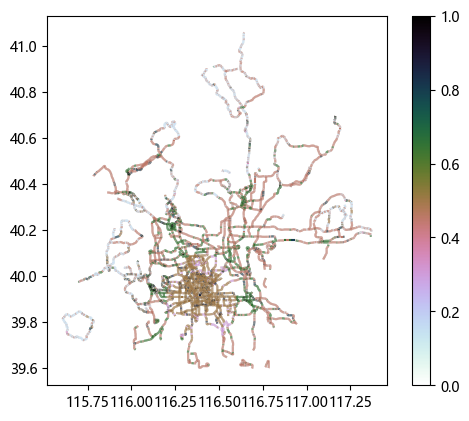

In [35]:
# 初步呈现与导出
gdf.plot(column='star',legend=True, cmap='cubehelix_r')
gdf.to_file('../tempdata3/亲子家庭.shp')

### 资深驴友登山探险

1. 选择类型：登山
2. 选择要素：挑战性、市中心距离（反向）
3. 选择权重：熵权法

In [20]:
# 数据读取
gdf = gpd.read_file('../workingdata5/登山.shp')
gdf = gdf.to_crs(4326)

In [21]:
# 指标预处理
distance(gdf)
gdf['distance'] = 1 - gdf['distance']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29716\1234676990.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['distance'] = df['geometry'].distance(point)


In [22]:
# 指标间加权
gdf = gdf.loc[:,['dem','distance','scene_n','geometry']]
w_lst = [0.5, 0.15, 0.35]
gdf['star'] = gdf['dem']*w_lst[0] + gdf['distance']*w_lst[1] + gdf['scene_n']*w_lst[2]

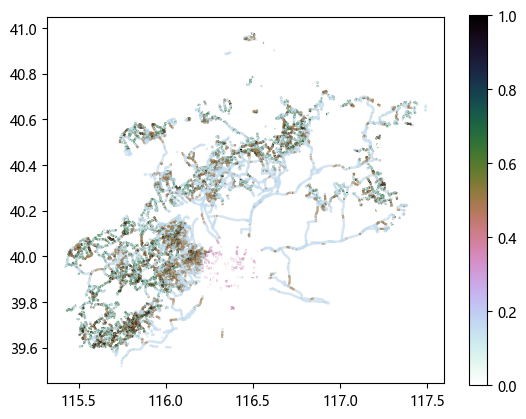

In [23]:
# 初步呈现与导出
gdf.plot(column='star',legend=True, cmap='cubehelix_r')
gdf.to_file('../tempdata3/资深驴友.shp')

### 都市白领逛街购物

1. 选择类型：徒步
2. 选择要素：挑战性（反向）、服务设施完善程度、市中心距离
3. 选择权重：熵权法

In [24]:
# 数据读取
gdf = gpd.read_file('../workingdata5/徒步.shp')
gdf = gdf.to_crs(4326)

In [25]:
# 指标预处理
gdf['dem'] = 1 - gdf['dem']
distance(gdf)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_29716\1234676990.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df['distance'] = df['geometry'].distance(point)


In [26]:
# 指标间加权
gdf = gdf.loc[:,['dem','serve','distance','scene_n','geometry']]
w_lst = [0.3, 0.2, 0.35, 0.15]
gdf['star'] = gdf['dem']*w_lst[0] + gdf['serve']*w_lst[1] + gdf['distance']*w_lst[2] + gdf['scene_n']*w_lst[3]

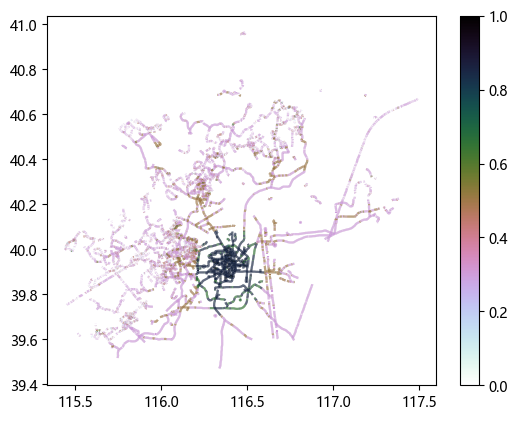

In [27]:
# 初步呈现与导出
gdf.plot(column='star',legend=True, cmap='cubehelix_r')
gdf.to_file('../tempdata3/都市白领.shp')

## 可视化数据

In [29]:
def outgraph(column,name):
    gdf.plot(column=column,legend=True,cmap='copper',scheme='quantiles')
    plt.title('骑行-{}'.format(name))
    plt.savefig('../outputs/骑行-{}.png'.format(name))

E:\Program Files\miniconda3\envs\gpd\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  warnings.warn(
E:\Program Files\miniconda3\envs\gpd\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  warnings.warn(
E:\Program Files\miniconda3\envs\gpd\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  warnings.warn(
E:\Program Files\miniconda3\envs\gpd\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  warnings.warn(
E:\Program Files\miniconda3\envs\gpd\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.
  warnings.warn(


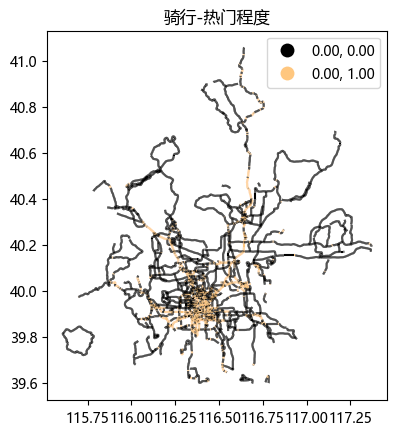

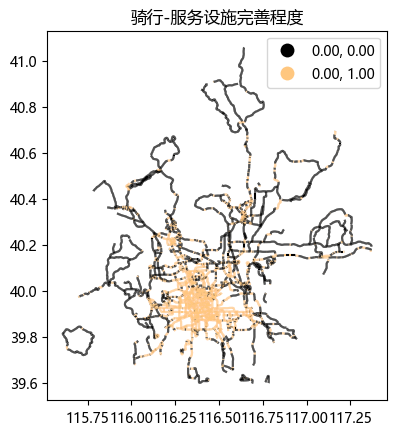

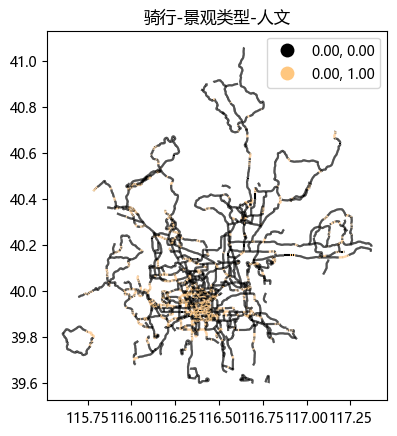

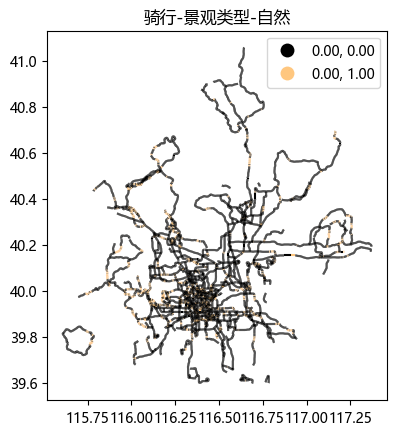

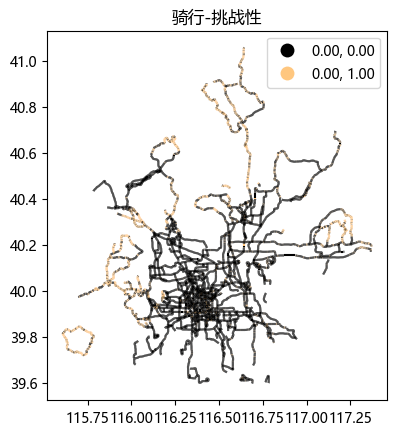

In [30]:
link_dict = {'热门程度':'hot','服务设施完善程度':'serve','景观类型-人文':'scene_h','景观类型-自然':'scene_n','挑战性':'dem'}
for name,column in link_dict.items():
    outgraph(column,name)

dict_items([('热门程度', 'hot'), ('服务设施完善程度', 'serve'), ('景观类型-人文', 'scene_h'), ('景观类型-自然', 'scene_n'), ('挑战性', 'dem')])

In [70]:
# 基准数据
gdf = gpd.read_file('../tempdata2/坡度/登山坡度.shp')
gdf.head()

,OBJECTID_1,MEAN,SHAPE_Leng,高难度_,geometry
0,1,10.920102,50.000006,0,"LINESTRING (454825.528 4533947.230, 454810.708..."
1,2,14.954751,13.235503,0,"LINESTRING (454707.104 4533618.757, 454703.520..."
2,3,8.355904,50.000016,0,"LINESTRING (454722.675 4533666.194, 454715.372..."
3,4,12.013155,49.999935,0,"LINESTRING (454740.901 4533712.725, 454739.481..."
4,5,29.926668,49.999986,0,"LINESTRING (454754.530 4533760.831, 454740.901..."


In [78]:
# 连接字段
gdf_1 = gpd.read_file('../tempdata2/线密度/dengshan_density.shp')
gdf_1.head()

,Join_Count,SHAPE_Leng,geometry
0,8,50.000006,"LINESTRING (454825.528 4533947.230, 454810.708..."
1,69,13.235503,"LINESTRING (454707.104 4533618.757, 454703.520..."
2,69,50.000016,"LINESTRING (454722.675 4533666.194, 454715.372..."
3,13,49.999935,"LINESTRING (454740.901 4533712.725, 454739.481..."
4,13,49.999986,"LINESTRING (454754.530 4533760.831, 454740.901..."


In [40]:
gdf.describe()

,dem,serve,hot,SHAPE_Leng,weather0,weather1,weather2,scene_h,scene_n
count,81798.000000,81798.000000,81798.000000,81798.000000,81798.0,81798.0,81798.0,81798.000000,81798.000000
mean,0.176606,0.270068,0.194516,48.329202,1.0,1.0,1.0,0.074317,0.091812
std,0.381337,0.443997,0.395830,7.685966,0.0,0.0,0.0,0.262288,0.288761
min,0.000000,0.000000,0.000000,0.001581,1.0,1.0,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,49.999963,1.0,1.0,1.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,49.999999,1.0,1.0,1.0,0.000000,0.000000
75%,0.000000,1.000000,0.000000,50.000027,1.0,1.0,1.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,50.000144,1.0,1.0,1.0,1.000000,1.000000


## 组合数据

In [72]:
gdf['scene'] = gdf_1['main_cla']

In [77]:
gdf['serve'] = gdf_1['服务_1']

In [79]:
gdf['hot'] = gdf_1['Join_Count']

In [80]:
# 二值化
q = gdf['hot'].quantile(q=0.82)
gdf['hot'] = gdf['hot'].apply(lambda x: 1 if x > q else 0)

In [73]:
# 景观类型二值化
gdf['scene_h'] = gdf['scene'].apply(lambda x: 1 if x=='manmade' or x=='natural&manmade' else 0)
gdf['scene_n'] = gdf['scene'].apply(lambda x: 1 if x=='natural' or x=='natural&manmade' else 0)
gdf = gdf.drop('scene',axis=1)

In [82]:
gdf = gdf.iloc[:,2:]

In [81]:
gdf.describe()

,OBJECTID_1,MEAN,SHAPE_Leng,高难度_,scene_h,scene_n,serve,hot
count,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000
mean,81086.794094,15.880724,44.133187,0.152574,0.147787,0.269562,0.282807,0.177330
std,56350.493476,12.325976,13.549753,0.359577,0.354889,0.443734,0.450365,0.381949
min,0.000000,0.000000,0.001581,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29937.000000,5.010129,49.999934,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79337.000000,14.045543,49.999986,0.000000,0.000000,0.000000,0.000000,0.000000
75%,130649.000000,24.957343,50.000021,0.000000,0.000000,1.000000,1.000000,0.000000
max,180077.000000,71.112701,50.001062,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
# 重命名
gdf.columns = ['SHAPE_Leng','dem','geometry','scene_h','scene_n','serve','hot']

In [84]:
gdf.describe()

,SHAPE_Leng,dem,scene_h,scene_n,serve,hot
count,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000,180077.000000
mean,44.133187,0.152574,0.147787,0.269562,0.282807,0.177330
std,13.549753,0.359577,0.354889,0.443734,0.450365,0.381949
min,0.001581,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.999934,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.999986,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000021,0.000000,0.000000,1.000000,1.000000,0.000000
max,50.001062,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
# 导出
gdf.to_file('../workingdata5/登山.shp')

## 根据近邻关系将天气信息赋给小节

In [86]:
workingdata = '../workingdata5/登山.shp'

In [87]:
import geopandas as gpd
import shapely.geometry
import shapely.ops
import cartopy.crs as ccrs

# 读取点要素和线要素
point_gdf = gpd.read_file("../rawdata/北京市行政边界-气候.shp")  # point_features是一个包含点要素的可迭代对象
gdf = gpd.read_file(workingdata)  # line_features是一个包含线要素的可迭代对象
gdf = gdf.to_crs(4326)

In [88]:
name_lst = ['weather0','weather1','weather2']

In [89]:
# 获取每个点的坐标
point_coords = [shapely.geometry.Point(xy) for xy in zip(point_gdf.geometry.x, point_gdf.geometry.y)]

# 遍历每条线，找到最近邻的点，将点要素的属性赋值给线要素
for i, line in gdf.iterrows():
    nearest_point = shapely.ops.nearest_points(line.geometry, point_coords)[1][0]  # nearest_points返回一个元组，第一个元素是输入几何对象，第二个元素是最近邻几何对象
    nearest_index = point_coords.index(nearest_point)  # 找到最近邻点在点要素列表中的索引
    for typename in name_lst:
        gdf.loc[i, typename] = point_gdf.loc[nearest_index, typename]  # 将点要素的属性赋值给线要素
    print(i,end='\r')

In [90]:
gdf = gdf.to_crs(ccrs.UTM(zone=50))

In [91]:
gdf.head()

,SHAPE_Leng,dem,scene_h,scene_n,serve,hot,geometry,weather0,weather1,weather2
0,50.000006,0,0,1,0,0,"LINESTRING (454825.528 4533947.230, 454810.708...",1.0,1.0,1.0
1,13.235503,0,0,1,0,1,"LINESTRING (454707.104 4533618.757, 454703.520...",1.0,1.0,1.0
2,50.000016,0,0,1,0,1,"LINESTRING (454722.675 4533666.194, 454715.372...",1.0,1.0,1.0
3,49.999935,0,0,1,0,0,"LINESTRING (454740.901 4533712.725, 454739.481...",1.0,1.0,1.0
4,49.999986,0,0,1,0,0,"LINESTRING (454754.530 4533760.831, 454740.901...",1.0,1.0,1.0


In [92]:
gdf.to_file(workingdata,encoding='utf-8')

## 构建邻接表

In [93]:
from rtree import index
import shapefile
from shapely.geometry import LineString
import numpy as np

In [94]:
# 读取文件
fi = shapefile.Reader(workingdata)
records = pd.DataFrame(fi.records(),columns=[i[0] for i in fi.fields[1:]])  # 用于加权计算
geoms = fi.shapes()  # 地理信息
fi.close()

In [95]:
# 构建坐标系（米）
offset = 10
spatial_index = index.Index()
for gi, geom in enumerate(geoms):
    left, bottom, right, top = geom.bbox
    spatial_index.insert(gi, (left - offset, bottom - offset, right + offset, top + offset))

In [96]:
# 构建邻接表
adjacent = {}
for gi, geom in enumerate(geoms):
    line_base = LineString(geom.points)
    features_nearby = list(spatial_index.intersection(geom.bbox))
    fidx_lst = [fidx for fidx in features_nearby if line_base.intersects(LineString(geoms[fidx].points))]
    adjacent[gi] = fidx_lst
    print(gi)

In [97]:
np.save(workingdata[:-4]+'.npy',adjacent)